# Plot

In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm
import itertools

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']

### Form Factor in the mChi=mST and mtop = 0 limit

In [2]:

def L(sr,mSTr):

    s = sr + 0j
    mST = mSTr + 0j
    l = np.log(np.sqrt(s*(s-4*mST**2)) + 2*mST**2-s) - np.log(2*mST**2)
    return l

@np.vectorize
def FmuLimit(sr,mSTr=1.0):

    s = sr + 0j
    mST = mSTr + 0j

    f = (1/s**2)*(3*s + np.sqrt(s*(-4*mST**2 + s))*L(s, mST) + mST**2*L(s, mST)**2)

    return f

In [3]:
sv = np.linspace(0.1,20,200)

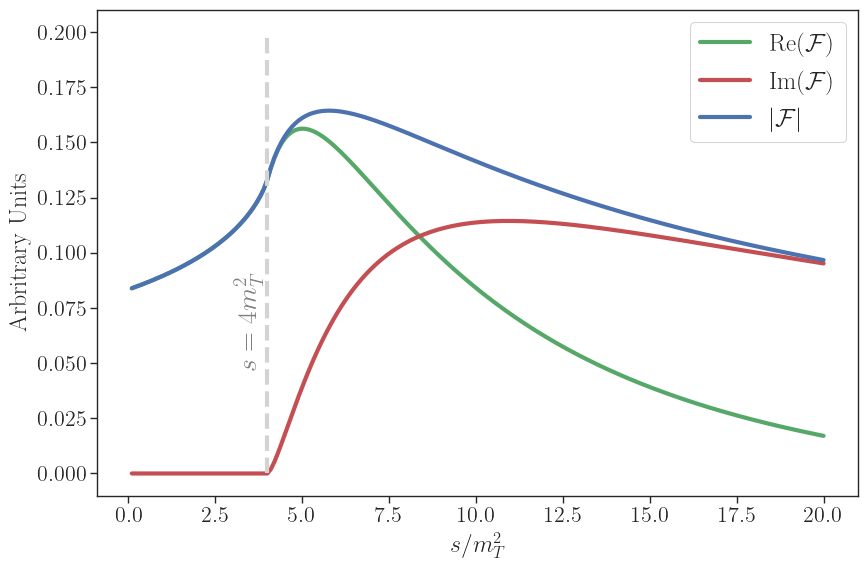

In [17]:
plt.figure(figsize=(9,6))
colors = sns.color_palette('deep')
plt.plot(sv,np.real(FmuLimit(sv)),linewidth=3,label=r'Re($\mathcal{F}$)',color=colors[2])
plt.plot(sv,np.imag(FmuLimit(sv)),linewidth=3,label=r'Im($\mathcal{F}$)',color=colors[3])
plt.plot(sv,np.abs(FmuLimit(sv)),linewidth=3,label=r'$|\mathcal{F}|$',color=colors[0])
plt.vlines(x=4.0,ymin=0.,ymax=0.2,linestyles='dashed',linewidth=3,colors='lightgray')
plt.text(3.,0.05,r'$s = 4 m_T^2$',c='gray',fontsize=20,rotation=90)
plt.xlabel(r'$s/m_T^2$')
plt.ylabel('Arbritrary Units')
plt.legend(loc='upper right',fontsize=18)
plt.tight_layout()
plt.savefig('formfactorLimit.png')
plt.show()